Your function returned a count of 1196  cars and 1125  non-cars
of size:  (64, 64, 3)  and data type: uint8


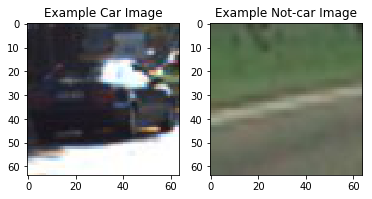

In [1]:
### Example of car and not car

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

# images are divided up into vehicles and non-vehicles
images = glob.glob('./test_data_set/*.jpeg')
cars = []
notcars = []

for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)
        
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict
    
data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')
plt.savefig("./output_images/fig1.png")
plt.show()

C:\Users\10001161181\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


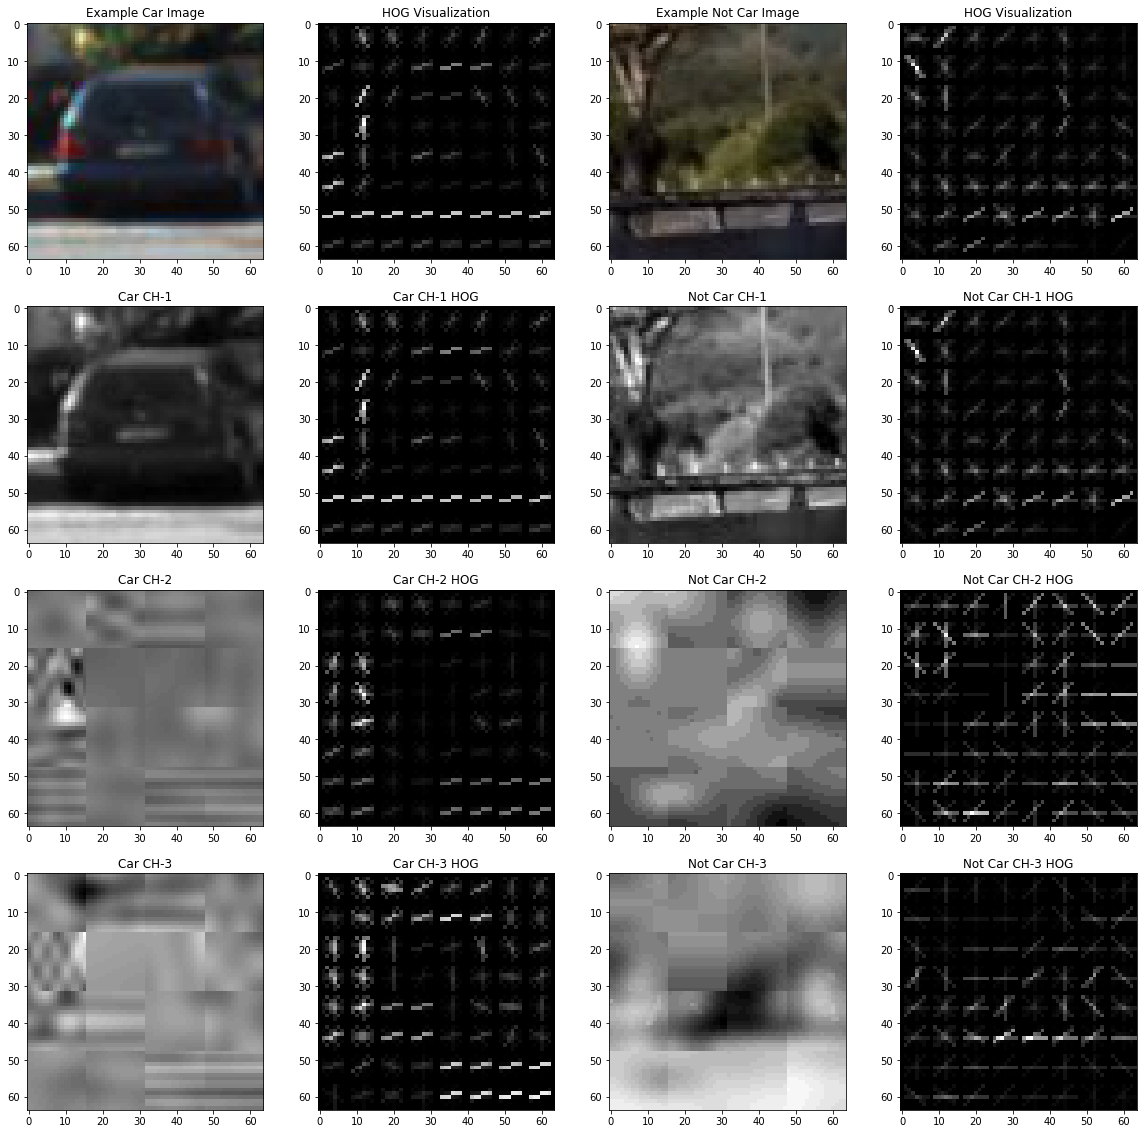

In [2]:
### Histogram of Oriented Gradients (HOG)

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog

# Read in our vehicles and non-vehicles
images = glob.glob('./test_data_set/*.jpeg')
cars = []
notcars = []

for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)
        
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features

# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))
# Read in the image
image = mpimg.imread(cars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

# Plot the examples
fig = plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(4,4,2)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')

YCrCb = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb) 

plt.subplot(4,4,5)  
plt.imshow(YCrCb[:,:,0], cmap='gray')
plt.title('Car CH-1')
plt.subplot(4,4,9) 
plt.imshow(YCrCb[:,:,1], cmap='gray')
plt.title('Car CH-2')
plt.subplot(4,4,13)
plt.imshow(YCrCb[:,:,2], cmap='gray')
plt.title('Car CH-3')


hog1, hog_image1 = get_hog_features(YCrCb[:,:,0], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
hog2, hog_image2 = get_hog_features(YCrCb[:,:,1], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
hog3, hog_image3 = get_hog_features(YCrCb[:,:,2], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)   

plt.subplot(4,4,6)  
plt.imshow(hog_image1, cmap='gray')
plt.title('Car CH-1 HOG')
plt.subplot(4,4,10)  
plt.imshow(hog_image2, cmap='gray')
plt.title('Car CH-2 HOG')
plt.subplot(4,4,14) 
plt.imshow(hog_image3, cmap='gray')
plt.title('Car CH-3 HOG')


# Generate a random index to look at a car image
ind = np.random.randint(0, len(notcars))
# Read in the image
image = mpimg.imread(notcars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 8
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)


# Plot the examples
plt.subplot(4,4,3)
plt.imshow(image, cmap='gray')
plt.title('Example Not Car Image')
plt.subplot(4,4,4)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')

YCrCb = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb) 

plt.subplot(4,4,7) 
plt.imshow(YCrCb[:,:,0], cmap='gray')
plt.title('Not Car CH-1')
plt.subplot(4,4,11)  
plt.imshow(YCrCb[:,:,1], cmap='gray')
plt.title('Not Car CH-2')
plt.subplot(4,4,15)
plt.imshow(YCrCb[:,:,2], cmap='gray')
plt.title('Not Car CH-3')

hog1, hog_image1 = get_hog_features(YCrCb[:,:,0], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
hog2, hog_image2 = get_hog_features(YCrCb[:,:,1], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
hog3, hog_image3 = get_hog_features(YCrCb[:,:,2], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)   

plt.subplot(4,4,8) 
plt.imshow(hog_image1, cmap='gray')
plt.title('Not Car CH-1 HOG')
plt.subplot(4,4,12)   
plt.imshow(hog_image2, cmap='gray')
plt.title('Not Car CH-2 HOG')
plt.subplot(4,4,16) 
plt.imshow(hog_image3, cmap='gray')
plt.title('Not Car CH-3 HOG')
plt.savefig("./output_images/fig2.png")
plt.show()

In [27]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from lesson_functions import *

from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

 
# Read in cars and notcars
images_cars = glob.glob('./data_set/vehicles/**/*.png',recursive=True)
images_notcars = glob.glob('./data_set/non-vehicles/**/*.png',recursive=True)

cars = []
notcars = []
        
for image in images_notcars:
    notcars.append(image)     

for image in images_cars:
    cars.append(image)           
        
sample_size = 100
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 1  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
# hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
hog_channel = 1 # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)  
print(len(car_features))

# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC(C=0.001)
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

joblib.dump(svc, 'vehicle_detector.pkl') 

C:\Users\10001161181\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


100
Using: 1 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 1060
0.02 Seconds to train SVC...
Test Accuracy of SVC =  0.95


['vehicle_detector.pkl']

In [16]:
### Model test
import os

##############################################################################################  
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, window, cells_per_step):
    
    test_features = []
    box = []
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=False)    
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))     
        
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))            
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins) 
            
            print(spatial_features.shape)
            print(hist_features.shape)
            print(hog_features.shape)            
            
            # Scale features and make a prediction         
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1), y=None, copy=None)    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                box.append([(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)])
                
    return draw_img, box

##############################################################################################  
test_images = glob.glob('./test_images/test*.jpg')
cnt = 1
fig = plt.figure(figsize=(20,30))
column = 3

for file in test_images:
    image = mpimg.imread(file)         
    draw_image = np.copy(image)

    ystart = 400
    ystop = 656
    
    scale = 1.5
    window = 64    
    cells_per_step = 1      
    out_img, boxes = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, window, cells_per_step)
    plt.subplot(len(test_images),column,cnt)
    plt.imshow(out_img)
    plt.title(os.path.basename(file) +' slide pattern1')
    cnt = cnt + 1
    
    scale = 1
    window = 64    
    cells_per_step = 1      
    out_img, boxes = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, window, cells_per_step)
    plt.subplot(len(test_images),column,cnt)
    plt.imshow(out_img)
    plt.title(os.path.basename(file) +' slide pattern2')
    cnt = cnt + 1    
    
    scale = 2
    window = 128    
    cells_per_step = 1      
    out_img, boxes = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, window, cells_per_step)
    plt.subplot(len(test_images),column,cnt)
    plt.imshow(out_img)
    plt.title(os.path.basename(file) +' slide pattern3')
    cnt = cnt + 1        
    
plt.savefig("./output_images/fig4.png")
plt.show()

C:\Users\10001161181\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)


(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)


(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)
(1188,)
(768,)
(96,)


KeyboardInterrupt: 

C:\Users\10001161181\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


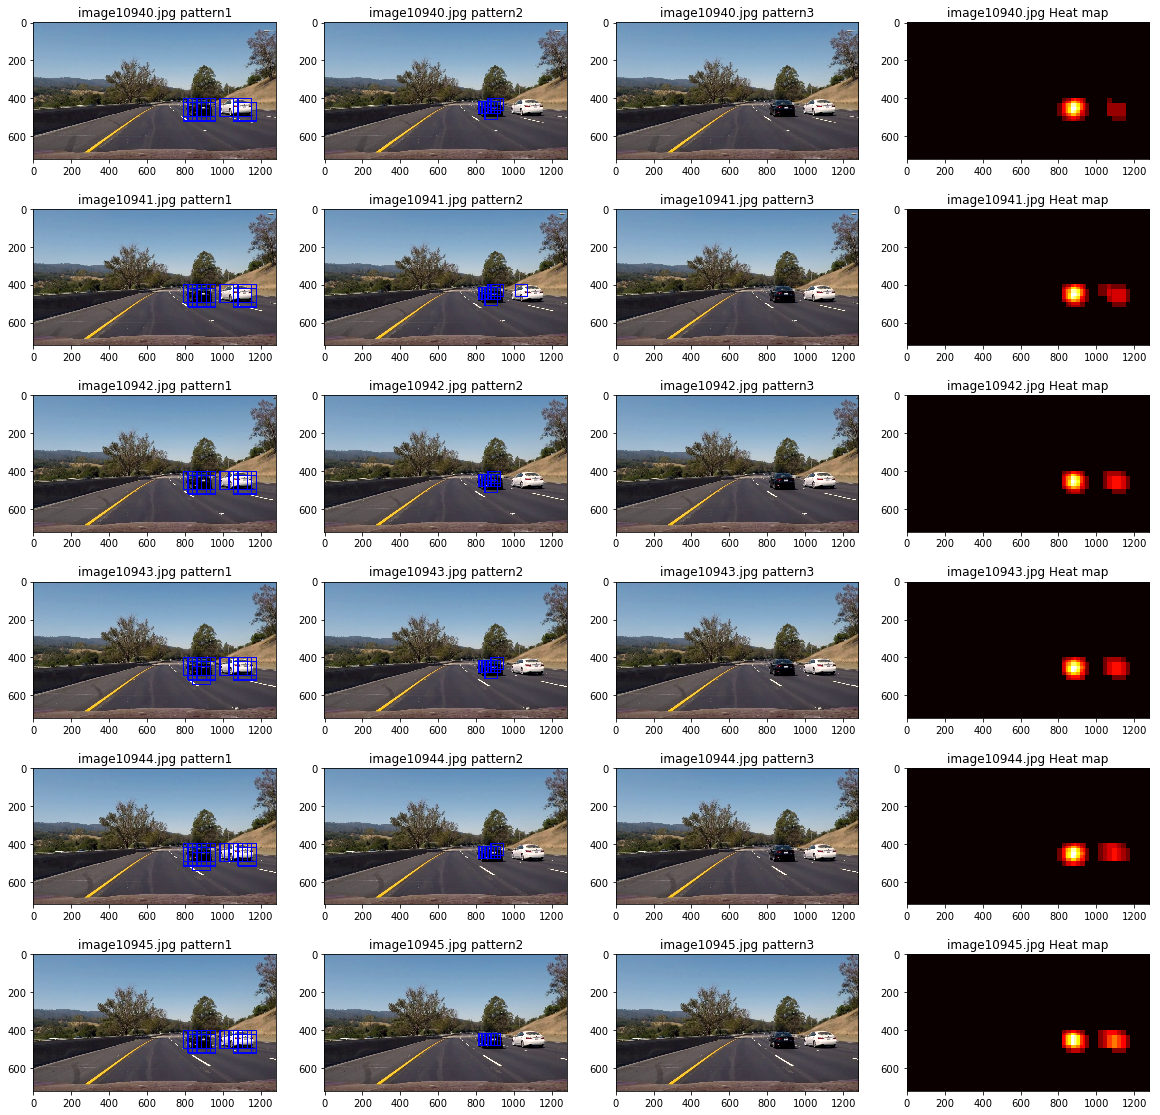

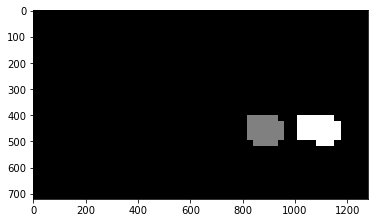

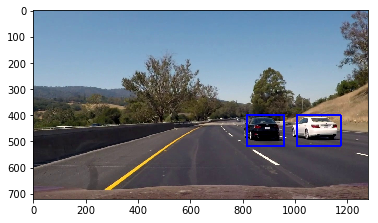

In [10]:
# Heat map

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

##############################################################################################  
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

#############################################################################################  
# test_images = glob.glob('./movie/image15.jpg')
test_images = glob.glob('./movie2/image1094[0-5]*.jpg')
cnt = 1
fig = plt.figure(figsize=(20,20))
column = 4
boxes = []

for file in test_images:
    image = mpimg.imread(file)         
    draw_image = np.copy(image)
    ystart = 400
    ystop = 656
    
    scale = 1.5
    window = 64    
    cells_per_step = 1      
    out_img, boxes_1 = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, window, cells_per_step)
    plt.subplot(len(test_images),column,cnt)
    plt.imshow(out_img)
    plt.title(os.path.basename(file) +' pattern1')
    cnt = cnt + 1
    
    scale = 1
    window = 64    
    cells_per_step = 1      
    out_img, boxes_2 = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, window, cells_per_step)
    plt.subplot(len(test_images),column,cnt)
    plt.imshow(out_img)
    plt.title(os.path.basename(file) +' pattern2')
    cnt = cnt + 1    
    
    scale = 2
    window = 128    
    cells_per_step = 1      
    out_img, boxes_3 = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, window, cells_per_step)
    plt.subplot(len(test_images),column,cnt)
    plt.imshow(out_img)
    plt.title(os.path.basename(file) +' pattern3')
    cnt = cnt + 1     
    
    boxes = boxes_1 + boxes_2 + boxes_3
    
    # Each item in the "all_bboxes" list will contain a 
    # list of boxes for one of the images shown above
    box_list = boxes

    # Read in image similar to one shown above 
    heat = np.zeros_like(image[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat,box_list)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)

    plt.subplot(len(test_images),column,cnt)
    plt.imshow(heatmap, cmap='hot')
    plt.title(os.path.basename(file) + ' Heat map')
    cnt = cnt + 1
        
plt.savefig("./output_images/fig5.png")
plt.show()

plt.imshow(labels[0], cmap='gray')
plt.savefig("./output_images/fig6.png")
plt.show()

draw_img = draw_labeled_bboxes(np.copy(image), labels)
plt.imshow(draw_img)
plt.savefig("./output_images/fig7.png")
plt.show()

C:\Users\10001161181\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


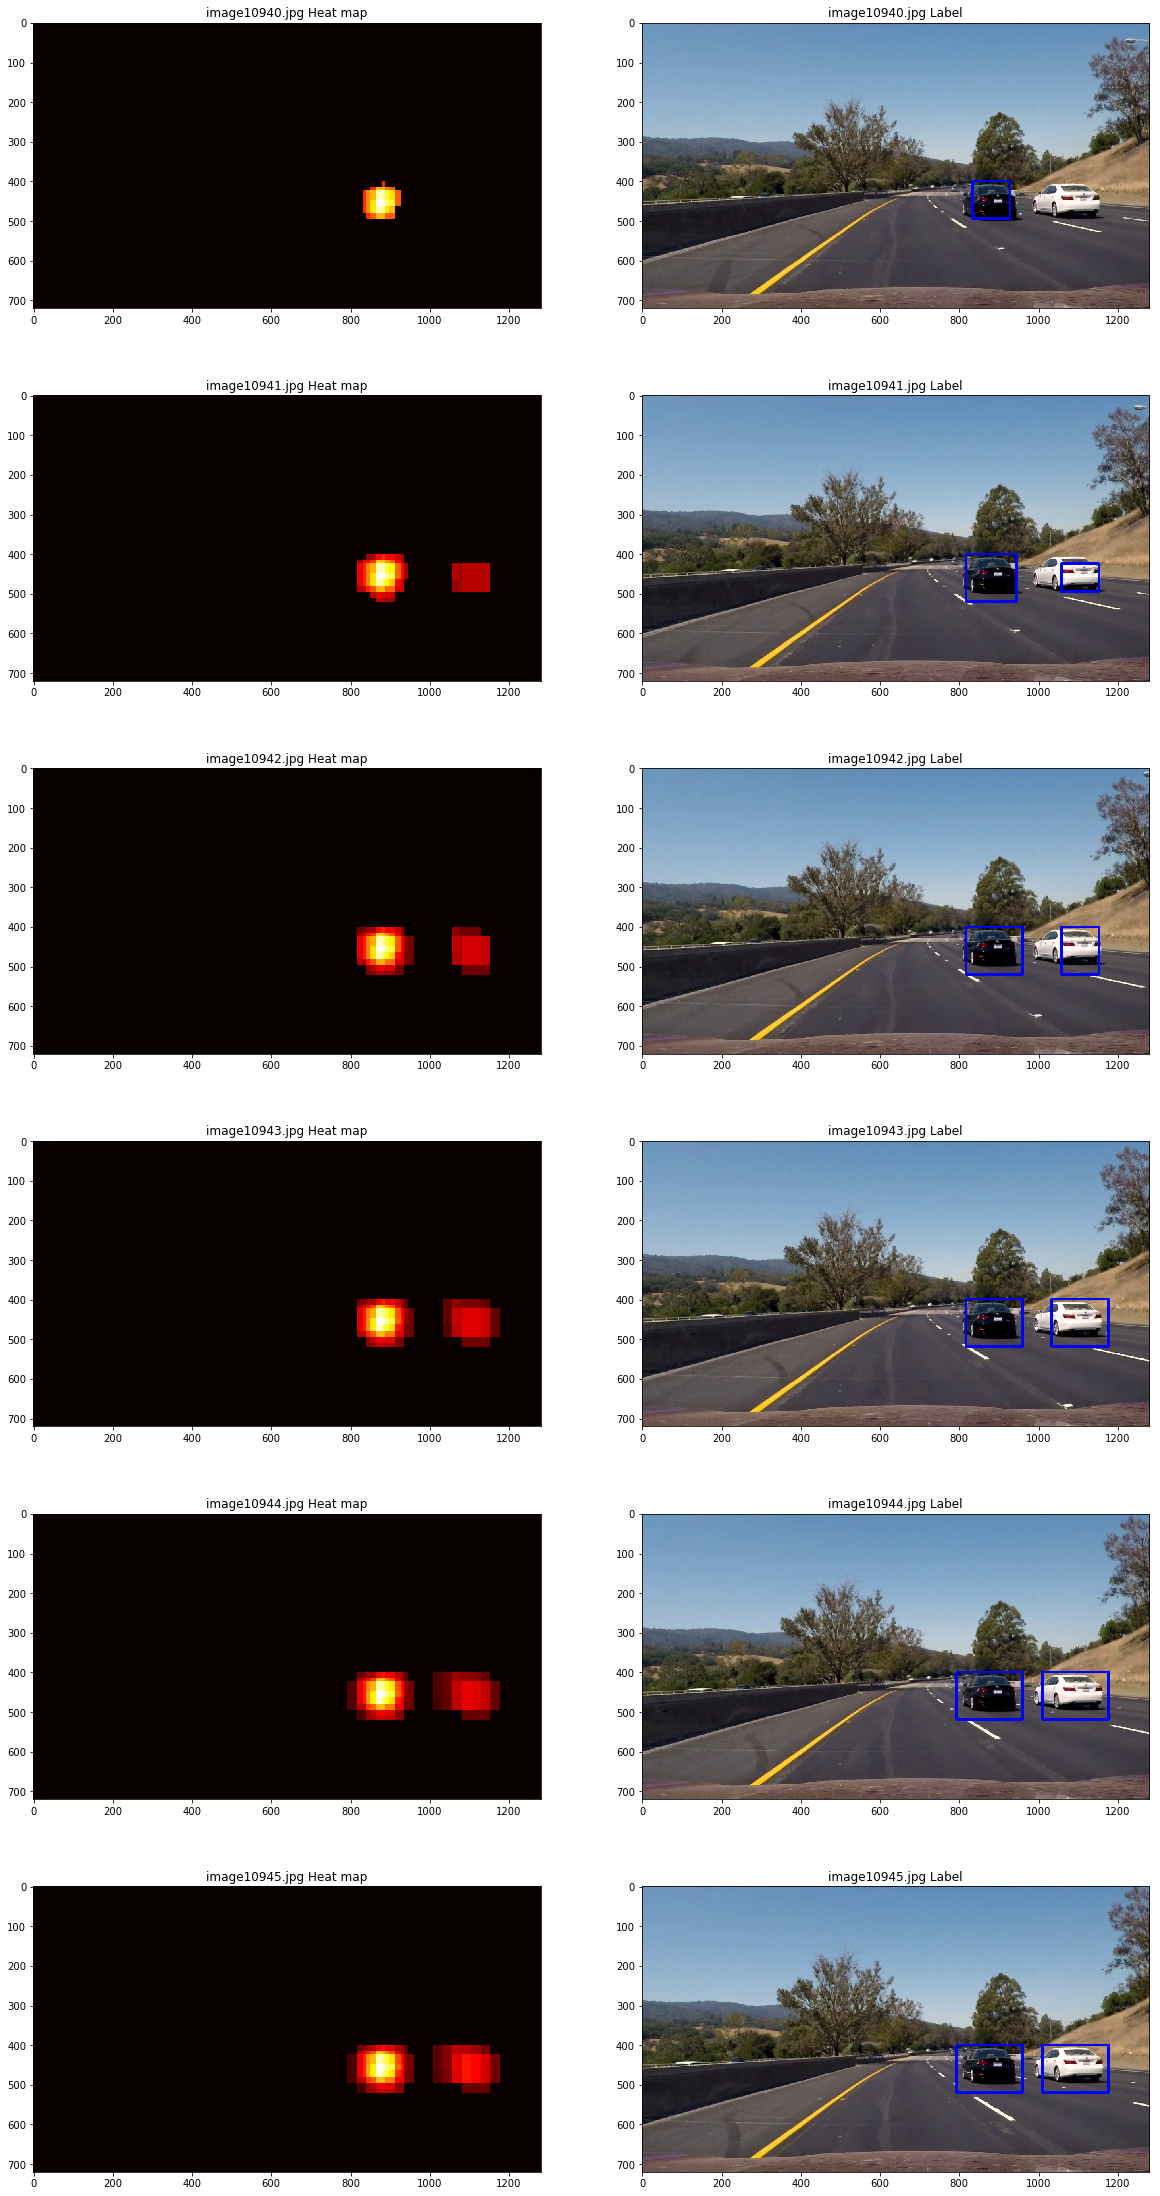

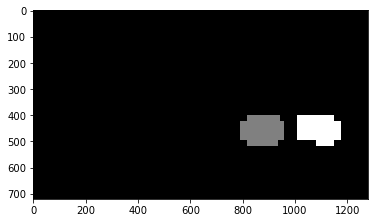

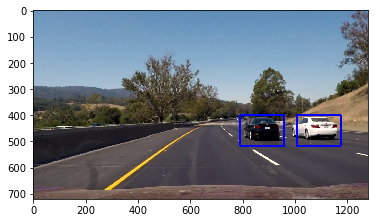

In [13]:
# Heat map filter

cnt = 1
fig = plt.figure(figsize=(20,40))

box_tmp_1 = []
box_tmp_2 = []
box_tmp_3 = []
box_tmp_4 = []
box_tmp_5 = []
box_tmp = []
boxes = []
heat = []

for file in test_images:
    image = mpimg.imread(file)         
    draw_image = np.copy(image)
    ystart = 400
    ystop = 656
    
    scale = 1.5
    window = 64    
    cells_per_step = 1      
    out_img, boxes_1 = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, window, cells_per_step)

    scale = 1
    window = 64    
    cells_per_step = 1      
    out_img, boxes_2 = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, window, cells_per_step)
   
    scale = 2
    window = 128    
    cells_per_step = 1      
    out_img, boxes_3 = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, window, cells_per_step)   
    
    boxes = boxes_1 + boxes_2 + boxes_3

    box_list = boxes
    box_tmp_5 = box_tmp_4
    box_tmp_4 = box_tmp_3
    box_tmp_3 = box_tmp_2
    box_tmp_2 = box_tmp_1
    box_tmp_1 = box_list
    box_tmp = box_tmp_5 + box_tmp_4 + box_tmp_3 + box_tmp_2 + box_tmp_1
    
    # Read in image similar to one shown above 
    heat = np.zeros_like(image[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat,box_tmp)
    
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,5)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)

    plt.subplot(len(test_images),2,cnt)
    plt.imshow(heatmap, cmap='hot')
    plt.title(os.path.basename(file) + ' Heat map')
    cnt = cnt + 1
    
    plt.subplot(len(test_images),2,cnt)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    plt.imshow(draw_img)
    plt.title(os.path.basename(file) + ' Label')
    cnt = cnt + 1    
        
plt.savefig("./output_images/fig8.png")
plt.show()

plt.imshow(labels[0], cmap='gray')
plt.savefig("./output_images/fig9.png")
plt.show()

draw_img = draw_labeled_bboxes(np.copy(image), labels)
plt.imshow(draw_img)
plt.savefig("./output_images/fig10.png")
plt.show()

In [15]:
import numpy as np
import cv2
import tkinter.filedialog as tkfd
from lesson_functions import *
from scipy.ndimage.measurements import label

# Read movie
cap = cv2.VideoCapture('./project_video.mp4')

# Buffer initialization
ret, frame = cap.read()

# Convert setting
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('vehicle_detection_result.avi',fourcc, 30.0, (frame.shape[1],frame.shape[0]))


box_tmp_1 = []
box_tmp_2 = []
box_tmp_3 = []
box_tmp_4 = []
box_tmp_5 = []
box_tmp = []
boxes = []
heat = []

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:

        #######################################################################################################
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        ystart = 400
        ystop = 656
        
        scale = 1.5
        window = 64    
        cells_per_step = 1      
        out_img, boxes_1 = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, window, cells_per_step)

        scale = 1
        window = 64    
        cells_per_step = 1      
        out_img, boxes_2 = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, window, cells_per_step)

#         scale = 2
#         window = 128    
#         cells_per_step = 1      
#         out_img, boxes_3 = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, window, cells_per_step)   

        boxes = boxes_1 + boxes_2 + boxes_3        
        
        #######################################################################################################     
        
        # Read in a pickle file with bboxes saved
        # Each item in the "all_bboxes" list will contain a 
        # list of boxes for one of the images shown above
        box_list = boxes
        box_tmp_5 = box_tmp_4
        box_tmp_4 = box_tmp_3
        box_tmp_3 = box_tmp_2
        box_tmp_2 = box_tmp_1
        box_tmp_1 = box_list
        box_tmp = box_tmp_5 + box_tmp_4 + box_tmp_3 + box_tmp_2 + box_tmp_1    

        # Read in image similar to one shown above 
        heat = np.zeros_like(image[:,:,0]).astype(np.float)
 
        # Add heat to each box in box list
        heat = add_heat(heat,box_tmp)        

        # Apply threshold to help remove false positives
        heat = apply_threshold(heat,5)

        # Visualize the heatmap when displaying    
        heatmap = np.clip(heat, 0, 255)

        # Find final boxes from heatmap using label function
        labels = label(heatmap)
        draw_img = draw_labeled_bboxes(np.copy(frame), labels)
        
        #######################################################################################################          
        showed_image = draw_img
        
        # Show movie
        out.write(showed_image)
        cv2.imshow('frame', showed_image)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

C:\Users\10001161181\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
